## Introduction

In this project, I will analyze the spread of the new corona virus (nCov). I will use two datasets:
    - The John Hopkins University's dataset which contains aggregated daily data for confirmed cases, deaths and recovered patients. 
    https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
    - The DXY.cn's google sheet which contains information of about 1000 patients. 
    https://docs.google.com/spreadsheets/d/1jS24DjSPVWa4iuxuD4OAXrE3QeI8c9BC1hSlqr-NMiU/edit#gid=1187587451



29.02.2020

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url_case = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_cured = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

Let's take a look at the case time series first

In [3]:
# 1st data table

case = pd.read_csv(url_case, index_col=[0, 1, 2, 3])

In [4]:
case

1/22/20  1/23/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        2        3   
               Japan                  36.0000  138.0000        2        1   
               Singapore              1.2833   103.8333        0        1   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/24/20  1/25/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        5        7   
               Japan                  36.0000  138.0000        2        2   
               Singapore              1.2833   103.8333        3        3   
               Nepal                  28.1667  84.2500         0        1   
               Malaysia               2.5000   112.5000        0        3   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/26/20  1/27/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        8        8   
               Japan                  36.0000  138.0000        4        4   
               Singapore              1.2833   103.8333        4        5   
               Nepal                  28.1667  84.2500         1        1   
               Malaysia               2.5000   112.5000        4        4   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/28/20  1/29/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000       14       14   
               Japan                  36.0000  138.0000        7        7   
               Singapore              1.2833   103.8333        7        7   
               Nepal                  28.1667  84.2500         1        1   
               Malaysia               2.5000   112.5000        4        7   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                 

In [5]:
stacked = case.stack()
stacked

Province/State  Country/Region  Lat      Long           
NaN             Thailand        15.0000   101.0  1/22/20    2.0
                                                 1/23/20    3.0
                                                 1/24/20    5.0
                                                 1/25/20    7.0
                                                 1/26/20    8.0
                                                           ... 
                The Gambia      13.4667  -16.6   3/19/20    0.0
                                                 3/20/20    0.0
                                                 3/21/20    0.0
                                                 3/22/20    0.0
                                                 3/23/20    0.0
Length: 30870, dtype: float64

In [6]:
unstacked = stacked.reset_index()
unstacked

,Province/State,Country/Region,Lat,Long,level_4,0
0,NaN,Thailand,15.0000,101.0,1/22/20,2.0
1,NaN,Thailand,15.0000,101.0,1/23/20,3.0
2,NaN,Thailand,15.0000,101.0,1/24/20,5.0
3,NaN,Thailand,15.0000,101.0,1/25/20,7.0
4,NaN,Thailand,15.0000,101.0,1/26/20,8.0
...,...,...,...,...,...,...
30865,NaN,The Gambia,13.4667,-16.6,3/19/20,0.0
30866,NaN,The Gambia,13.4667,-16.6,3/20/20,0.0
30867,NaN,The Gambia,13.4667,-16.6,3/21/20,0.0
30868,NaN,The Gambia,13.4667,-16.6,3/22/20,0.0


In [7]:
unstacked = unstacked.rename(columns={'level_4': 'date'})
unstacked

,Province/State,Country/Region,Lat,Long,date,0
0,NaN,Thailand,15.0000,101.0,1/22/20,2.0
1,NaN,Thailand,15.0000,101.0,1/23/20,3.0
2,NaN,Thailand,15.0000,101.0,1/24/20,5.0
3,NaN,Thailand,15.0000,101.0,1/25/20,7.0
4,NaN,Thailand,15.0000,101.0,1/26/20,8.0
...,...,...,...,...,...,...
30865,NaN,The Gambia,13.4667,-16.6,3/19/20,0.0
30866,NaN,The Gambia,13.4667,-16.6,3/20/20,0.0
30867,NaN,The Gambia,13.4667,-16.6,3/21/20,0.0
30868,NaN,The Gambia,13.4667,-16.6,3/22/20,0.0


In [8]:
new_df = unstacked.rename(columns={0: 'number_of_case'})
new_df['new_case'] = new_df.groupby('Country/Region').number_of_case.diff(1)
new_df

,Province/State,Country/Region,Lat,Long,date,number_of_case,new_case
0,NaN,Thailand,15.0000,101.0,1/22/20,2.0,NaN
1,NaN,Thailand,15.0000,101.0,1/23/20,3.0,1.0
2,NaN,Thailand,15.0000,101.0,1/24/20,5.0,2.0
3,NaN,Thailand,15.0000,101.0,1/25/20,7.0,2.0
4,NaN,Thailand,15.0000,101.0,1/26/20,8.0,1.0
...,...,...,...,...,...,...,...
30865,NaN,The Gambia,13.4667,-16.6,3/19/20,0.0,0.0
30866,NaN,The Gambia,13.4667,-16.6,3/20/20,0.0,0.0
30867,NaN,The Gambia,13.4667,-16.6,3/21/20,0.0,0.0
30868,NaN,The Gambia,13.4667,-16.6,3/22/20,0.0,0.0


In [9]:
# Delite strings where "number of case" = 0

#new_df = new_df[new_df.number_of_case != 0]
#new_df

In [10]:
new_df['Province/State'].unique()

array([nan, 'British Columbia', 'New South Wales', 'Victoria',
       'Queensland', 'South Australia', 'From Diamond Princess',
       'Western Australia', 'Tasmania', 'Northern Territory', 'Ontario',
       'Alberta', 'Quebec', 'Washington', 'New York', 'California',
       'Massachusetts', 'Diamond Princess', 'Grand Princess', 'Georgia',
       'Colorado', 'Florida', 'New Jersey', 'Oregon', 'Texas', 'Illinois',
       'Pennsylvania', 'Iowa', 'Maryland', 'North Carolina',
       'South Carolina', 'Tennessee', 'Virginia', 'Arizona', 'Indiana',
       'Kentucky', 'District of Columbia', 'Nevada', 'New Hampshire',
       'Minnesota', 'Nebraska', 'Ohio', 'Rhode Island', 'Wisconsin',
       'Connecticut', 'Hawaii', 'Oklahoma', 'Utah', 'Kansas', 'Louisiana',
       'Missouri', 'Vermont', 'Alaska', 'Arkansas', 'Delaware', 'Idaho',
       'Maine', 'Michigan', 'Mississippi', 'Montana', 'New Mexico',
       'North Dakota', 'South Dakota', 'West Virginia', 'Wyoming',
       'Hubei', 'France', 'G

In [11]:
new_df['Country/Region'].unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania',
       'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland',
       'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
       'Bhutan', 'Cameroon', 'Colombia', 'Costa R

In [12]:
#new_df.groupby('Country/Region').sum()

In [13]:
# 2st data table

death = pd.read_csv(url_death, index_col=[0, 1, 2, 3])
death

1/22/20  1/23/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        0        0   
               Japan                  36.0000  138.0000        0        0   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/24/20  1/25/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        0        0   
               Japan                  36.0000  138.0000        0        0   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/26/20  1/27/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        0        0   
               Japan                  36.0000  138.0000        0        0   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/28/20  1/29/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        0        0   
               Japan                  36.0000  138.0000        0        0   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                 

In [14]:
death_stacked = death.stack()
death_stacked

Province/State  Country/Region  Lat      Long           
NaN             Thailand        15.0000   101.0  1/22/20    0.0
                                                 1/23/20    0.0
                                                 1/24/20    0.0
                                                 1/25/20    0.0
                                                 1/26/20    0.0
                                                           ... 
                The Gambia      13.4667  -16.6   3/19/20    0.0
                                                 3/20/20    0.0
                                                 3/21/20    0.0
                                                 3/22/20    0.0
                                                 3/23/20    0.0
Length: 30870, dtype: float64

In [15]:
death_unstacked = death_stacked.reset_index()
death_unstacked

,Province/State,Country/Region,Lat,Long,level_4,0
0,NaN,Thailand,15.0000,101.0,1/22/20,0.0
1,NaN,Thailand,15.0000,101.0,1/23/20,0.0
2,NaN,Thailand,15.0000,101.0,1/24/20,0.0
3,NaN,Thailand,15.0000,101.0,1/25/20,0.0
4,NaN,Thailand,15.0000,101.0,1/26/20,0.0
...,...,...,...,...,...,...
30865,NaN,The Gambia,13.4667,-16.6,3/19/20,0.0
30866,NaN,The Gambia,13.4667,-16.6,3/20/20,0.0
30867,NaN,The Gambia,13.4667,-16.6,3/21/20,0.0
30868,NaN,The Gambia,13.4667,-16.6,3/22/20,0.0


In [16]:
new_df_death = death_unstacked.rename(columns={'level_4': 'date'})
new_df_death

,Province/State,Country/Region,Lat,Long,date,0
0,NaN,Thailand,15.0000,101.0,1/22/20,0.0
1,NaN,Thailand,15.0000,101.0,1/23/20,0.0
2,NaN,Thailand,15.0000,101.0,1/24/20,0.0
3,NaN,Thailand,15.0000,101.0,1/25/20,0.0
4,NaN,Thailand,15.0000,101.0,1/26/20,0.0
...,...,...,...,...,...,...
30865,NaN,The Gambia,13.4667,-16.6,3/19/20,0.0
30866,NaN,The Gambia,13.4667,-16.6,3/20/20,0.0
30867,NaN,The Gambia,13.4667,-16.6,3/21/20,0.0
30868,NaN,The Gambia,13.4667,-16.6,3/22/20,0.0


In [17]:
death_df = new_df_death.rename(columns={0: 'number_of_death'})
death_df['new_death'] = death_df.groupby('Country/Region').number_of_death.diff(1)
death_df

,Province/State,Country/Region,Lat,Long,date,number_of_death,new_death
0,NaN,Thailand,15.0000,101.0,1/22/20,0.0,NaN
1,NaN,Thailand,15.0000,101.0,1/23/20,0.0,0.0
2,NaN,Thailand,15.0000,101.0,1/24/20,0.0,0.0
3,NaN,Thailand,15.0000,101.0,1/25/20,0.0,0.0
4,NaN,Thailand,15.0000,101.0,1/26/20,0.0,0.0
...,...,...,...,...,...,...,...
30865,NaN,The Gambia,13.4667,-16.6,3/19/20,0.0,0.0
30866,NaN,The Gambia,13.4667,-16.6,3/20/20,0.0,0.0
30867,NaN,The Gambia,13.4667,-16.6,3/21/20,0.0,0.0
30868,NaN,The Gambia,13.4667,-16.6,3/22/20,0.0,0.0


In [18]:
# 3rd data table

cured = pd.read_csv(url_cured, index_col=[0, 1, 2, 3])
cured

1/22/20  1/23/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        0        0   
               Japan                  36.0000  138.0000        0        0   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/24/20  1/25/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        0        0   
               Japan                  36.0000  138.0000        0        0   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/26/20  1/27/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        2        2   
               Japan                  36.0000  138.0000        1        1   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/28/20  1/29/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        5        5   
               Japan                  36.0000  138.0000        1        1   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                 

In [19]:
cured_stacked = cured.stack()
cured_stacked

Province/State  Country/Region  Lat      Long           
NaN             Thailand        15.0000   101.0  1/22/20    0.0
                                                 1/23/20    0.0
                                                 1/24/20    0.0
                                                 1/25/20    0.0
                                                 1/26/20    2.0
                                                           ... 
                The Gambia      13.4667  -16.6   3/19/20    0.0
                                                 3/20/20    0.0
                                                 3/21/20    0.0
                                                 3/22/20    0.0
                                                 3/23/20    0.0
Length: 30870, dtype: float64

In [20]:
cured_unstacked = cured_stacked.reset_index()
cured_unstacked

,Province/State,Country/Region,Lat,Long,level_4,0
0,NaN,Thailand,15.0000,101.0,1/22/20,0.0
1,NaN,Thailand,15.0000,101.0,1/23/20,0.0
2,NaN,Thailand,15.0000,101.0,1/24/20,0.0
3,NaN,Thailand,15.0000,101.0,1/25/20,0.0
4,NaN,Thailand,15.0000,101.0,1/26/20,2.0
...,...,...,...,...,...,...
30865,NaN,The Gambia,13.4667,-16.6,3/19/20,0.0
30866,NaN,The Gambia,13.4667,-16.6,3/20/20,0.0
30867,NaN,The Gambia,13.4667,-16.6,3/21/20,0.0
30868,NaN,The Gambia,13.4667,-16.6,3/22/20,0.0


In [21]:
new_df_cured = cured_unstacked.rename(columns={'level_4': 'date'})
new_df_cured

,Province/State,Country/Region,Lat,Long,date,0
0,NaN,Thailand,15.0000,101.0,1/22/20,0.0
1,NaN,Thailand,15.0000,101.0,1/23/20,0.0
2,NaN,Thailand,15.0000,101.0,1/24/20,0.0
3,NaN,Thailand,15.0000,101.0,1/25/20,0.0
4,NaN,Thailand,15.0000,101.0,1/26/20,2.0
...,...,...,...,...,...,...
30865,NaN,The Gambia,13.4667,-16.6,3/19/20,0.0
30866,NaN,The Gambia,13.4667,-16.6,3/20/20,0.0
30867,NaN,The Gambia,13.4667,-16.6,3/21/20,0.0
30868,NaN,The Gambia,13.4667,-16.6,3/22/20,0.0


In [22]:
cured_df = new_df_cured.rename(columns={0: 'number_of_cured'})
cured_df['new_cured'] = cured_df.groupby('Country/Region').number_of_cured.diff(1)
cured_df

,Province/State,Country/Region,Lat,Long,date,number_of_cured,new_cured
0,NaN,Thailand,15.0000,101.0,1/22/20,0.0,NaN
1,NaN,Thailand,15.0000,101.0,1/23/20,0.0,0.0
2,NaN,Thailand,15.0000,101.0,1/24/20,0.0,0.0
3,NaN,Thailand,15.0000,101.0,1/25/20,0.0,0.0
4,NaN,Thailand,15.0000,101.0,1/26/20,2.0,2.0
...,...,...,...,...,...,...,...
30865,NaN,The Gambia,13.4667,-16.6,3/19/20,0.0,0.0
30866,NaN,The Gambia,13.4667,-16.6,3/20/20,0.0,0.0
30867,NaN,The Gambia,13.4667,-16.6,3/21/20,0.0,0.0
30868,NaN,The Gambia,13.4667,-16.6,3/22/20,0.0,0.0


In [23]:
# Put 3 tables in 1

#pd.merge(new_df, death_df,cured_df, on='Date', how='outer')

df2in1 = new_df.merge(death_df, how='left')
df2in1

,Province/State,Country/Region,Lat,Long,date,number_of_case,new_case,number_of_death,new_death
0,NaN,Thailand,15.0000,101.0,1/22/20,2.0,NaN,0.0,NaN
1,NaN,Thailand,15.0000,101.0,1/23/20,3.0,1.0,0.0,0.0
2,NaN,Thailand,15.0000,101.0,1/24/20,5.0,2.0,0.0,0.0
3,NaN,Thailand,15.0000,101.0,1/25/20,7.0,2.0,0.0,0.0
4,NaN,Thailand,15.0000,101.0,1/26/20,8.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
30865,NaN,The Gambia,13.4667,-16.6,3/19/20,0.0,0.0,0.0,0.0
30866,NaN,The Gambia,13.4667,-16.6,3/20/20,0.0,0.0,0.0,0.0
30867,NaN,The Gambia,13.4667,-16.6,3/21/20,0.0,0.0,0.0,0.0
30868,NaN,The Gambia,13.4667,-16.6,3/22/20,0.0,0.0,0.0,0.0


In [24]:
# 3 tables in 1

df3in1 = df2in1.merge(cured_df, how='left')
df3in1

,Province/State,Country/Region,Lat,Long,date,number_of_case,new_case,number_of_death,new_death,number_of_cured,new_cured
0,NaN,Thailand,15.0000,101.0,1/22/20,2.0,NaN,0.0,NaN,0.0,NaN
1,NaN,Thailand,15.0000,101.0,1/23/20,3.0,1.0,0.0,0.0,0.0,0.0
2,NaN,Thailand,15.0000,101.0,1/24/20,5.0,2.0,0.0,0.0,0.0,0.0
3,NaN,Thailand,15.0000,101.0,1/25/20,7.0,2.0,0.0,0.0,0.0,0.0
4,NaN,Thailand,15.0000,101.0,1/26/20,8.0,1.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
30865,NaN,The Gambia,13.4667,-16.6,3/19/20,0.0,0.0,0.0,0.0,0.0,0.0
30866,NaN,The Gambia,13.4667,-16.6,3/20/20,0.0,0.0,0.0,0.0,0.0,0.0
30867,NaN,The Gambia,13.4667,-16.6,3/21/20,0.0,0.0,0.0,0.0,0.0,0.0
30868,NaN,The Gambia,13.4667,-16.6,3/22/20,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Clining 0 values in column 'number_of_case'

df3in1 = df3in1.loc[df3in1['number_of_case'] != 0]
df3in1

,Province/State,Country/Region,Lat,Long,date,number_of_case,new_case,number_of_death,new_death,number_of_cured,new_cured
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,NaN,0.0,NaN,0.0,NaN
1,NaN,Thailand,15.0000,101.0000,1/23/20,3.0,1.0,0.0,0.0,0.0,0.0
2,NaN,Thailand,15.0000,101.0000,1/24/20,5.0,2.0,0.0,0.0,0.0,0.0
3,NaN,Thailand,15.0000,101.0000,1/25/20,7.0,2.0,0.0,0.0,0.0,0.0
4,NaN,Thailand,15.0000,101.0000,1/26/20,8.0,1.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
30125,NaN,Reunion,-21.1151,55.5364,3/23/20,47.0,47.0,0.0,0.0,0.0,0.0
30187,NaN,French Guiana,3.9339,-53.1258,3/23/20,18.0,18.0,0.0,0.0,6.0,6.0
30249,NaN,Mayotte,-12.8275,45.1662,3/23/20,11.0,11.0,0.0,0.0,0.0,0.0
30311,United States Virgin Islands,US,18.3358,-64.8963,3/23/20,6.0,6.0,0.0,0.0,0.0,0.0


In [26]:
# Add new column "location"
df3in1.insert(0, 'location', '')

In [27]:
df3in1

,location,Province/State,Country/Region,Lat,Long,date,number_of_case,new_case,number_of_death,new_death,number_of_cured,new_cured
0,,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,NaN,0.0,NaN,0.0,NaN
1,,NaN,Thailand,15.0000,101.0000,1/23/20,3.0,1.0,0.0,0.0,0.0,0.0
2,,NaN,Thailand,15.0000,101.0000,1/24/20,5.0,2.0,0.0,0.0,0.0,0.0
3,,NaN,Thailand,15.0000,101.0000,1/25/20,7.0,2.0,0.0,0.0,0.0,0.0
4,,NaN,Thailand,15.0000,101.0000,1/26/20,8.0,1.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30125,,NaN,Reunion,-21.1151,55.5364,3/23/20,47.0,47.0,0.0,0.0,0.0,0.0
30187,,NaN,French Guiana,3.9339,-53.1258,3/23/20,18.0,18.0,0.0,0.0,6.0,6.0
30249,,NaN,Mayotte,-12.8275,45.1662,3/23/20,11.0,11.0,0.0,0.0,0.0,0.0
30311,,United States Virgin Islands,US,18.3358,-64.8963,3/23/20,6.0,6.0,0.0,0.0,0.0,0.0


In [28]:
# Put in "location" Province/State. If there NA value, put Country/Region.
df3in1["location"] = np.where(df3in1["Province/State"].isnull(),df3in1['Province/State'],df3in1['Country/Region'])

/Users/olga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
# How many cases by countries

sum_of_cases= pd.DataFrame()
sum_of_cases = df3in1.groupby('location')['number_of_case'].sum() 
sum_of_cases.to_frame()


,number_of_case
location,
Australia,8695.0
Canada,9094.0
China,3531169.0
Cruise Ship,26228.0
Denmark,14142.0
France,118509.0
Netherlands,28103.0
US,159039.0
United Kingdom,35365.0


In [30]:
# Summary COVID-19

df3in1.agg({'number_of_case': 'sum', 'number_of_death': 'sum', 'number_of_cured' : "sum"})

number_of_case     5532341.0
number_of_death     196874.0
number_of_cured    1980983.0
dtype: float64

In [31]:
# Sum of new cases by dates and location 

df3in1.groupby(['location',df3in1['date']]).new_case.sum()
#df3in1['new_case'] = df3in1.groupby(['location', 'date']).number_of_case.sum().diff()


location        date   
Australia       1/26/20     4.0
                1/27/20     1.0
                1/28/20     0.0
                1/29/20     1.0
                1/30/20     3.0
                           ... 
United Kingdom  3/5/20     30.0
                3/6/20     48.0
                3/7/20     43.0
                3/8/20     67.0
                3/9/20     48.0
Name: new_case, Length: 451, dtype: float64

In [32]:
# Random checking
df3in1[(df3in1.location == "US") & (df3in1.date == '3/5/20')]


,location,Province/State,Country/Region,Lat,Long,date,number_of_case,new_case,number_of_death,new_death,number_of_cured,new_cured
6367,US,Diamond Princess,US,35.4437,139.6380,3/5/20,45.0,0.0,0.0,0.0,0.0,0.0
17393,US,"Alameda County, CA",US,37.6017,-121.7195,3/5/20,1.0,0.0,0.0,0.0,0.0,0.0
18613,US,"Providence County, RI",US,41.8882,-71.4774,3/5/20,2.0,0.0,0.0,0.0,0.0,0.0
19040,US,"Nassau County, NY",US,40.6546,-73.5594,3/5/20,1.0,1.0,0.0,0.0,0.0,0.0
19345,US,"Santa Clara County, CA",US,37.3541,-121.9552,3/5/20,20.0,9.0,0.0,0.0,1.0,0.0
19406,US,"Clark County, NV",US,36.0796,-115.0940,3/5/20,1.0,1.0,0.0,0.0,0.0,0.0
19467,US,"Fort Bend County, TX",US,29.5693,-95.8143,3/5/20,1.0,1.0,0.0,0.0,0.0,0.0
19528,US,"Grant County, WA",US,47.1981,-119.3732,3/5/20,1.0,1.0,0.0,0.0,0.0,0.0
19589,US,"Santa Rosa County, FL",US,30.7690,-86.9824,3/5/20,1.0,1.0,0.0,0.0,0.0,0.0
19650,US,"Williamson County, TN",US,35.9179,-86.8622,3/5/20,1.0,1.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Number of cases')

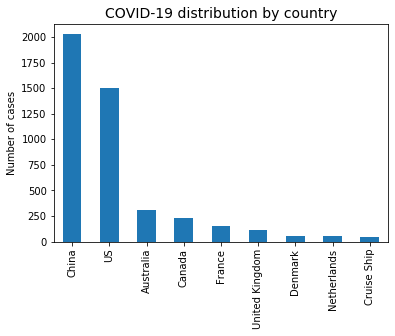

In [33]:
# Plot by countries

df3in1.location.value_counts().plot(kind='bar');
plt.title('COVID-19 distribution by country',fontsize=14)
plt.ylabel('Number of cases')

In [34]:
# Analysis by countries and cases
gb= pd.DataFrame()
gb= df3in1.groupby('location').agg({'number_of_case': 'sum', 'number_of_death': 'sum', 'number_of_cured' : "sum"})
gb

,number_of_case,number_of_death,number_of_cured
location,,,
Australia,8695.0,83.0,803.0
Canada,9094.0,106.0,228.0
China,3531169.0,119412.0,1787212.0
Cruise Ship,26228.0,189.0,4519.0
Denmark,14142.0,68.0,18.0
France,118509.0,3533.0,4760.0
Netherlands,28103.0,870.0,20.0
US,159039.0,2276.0,427.0
United Kingdom,35365.0,1382.0,808.0


In [35]:
gb= pd.DataFrame()
gb= df3in1.groupby('Province/State').agg({'number_of_case': 'sum', 'number_of_death': 'sum', 'number_of_cured' : "sum"})
gb

,number_of_case,number_of_death,number_of_cured
Province/State,,,
Alabama,705.0,0.0,0.0
"Alameda County, CA",10.0,0.0,0.0
Alaska,91.0,0.0,0.0
Alberta,1361.0,4.0,0.0
Anhui,47647.0,251.0,31689.0
...,...,...,...
Wyoming,144.0,0.0,0.0
Xinjiang,3523.0,96.0,2082.0
"Yolo County, CA",4.0,0.0,0.0


Text(0.5, 1.0, 'Plot max of death')

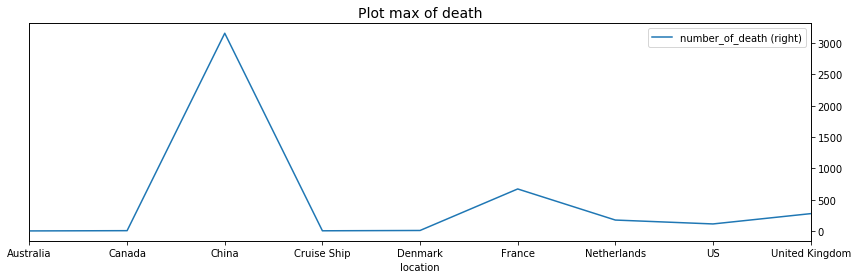

In [36]:
# Plot max of death

db = df3in1.groupby(["location"]).agg({'number_of_death': 'max'})
fig, ax = plt.subplots(figsize=(14, 4))
feature_2 = db.plot(kind='line', y='number_of_death',ax=ax, secondary_y=True)
plt.title('Plot max of death',fontsize=14)

Text(0.5, 1.0, 'Plot max of cured')

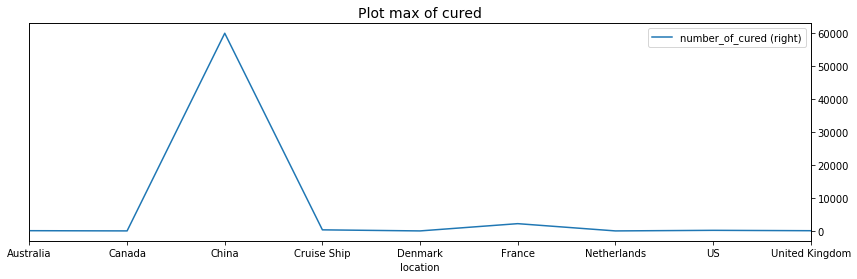

In [37]:
# Plot max of cured

db = df3in1.groupby(["location"]).agg({'number_of_cured': 'max'})
fig, ax = plt.subplots(figsize=(14, 4))
feature_2 = db.plot(kind='line', y='number_of_cured',ax=ax, secondary_y=True)
plt.title('Plot max of cured',fontsize=14)

In [38]:
# Mortality Rate (Percentage of deaths to infected people)

gb['number_of_death'].sum()*100/gb['number_of_case'].sum().round(2)

# RESULT: Globally, about 3.1% of reported COVID-19 cases have died. 
#By comparison, seasonal flu generally kills far fewer than 1% of those infected.


3.2546515012426394

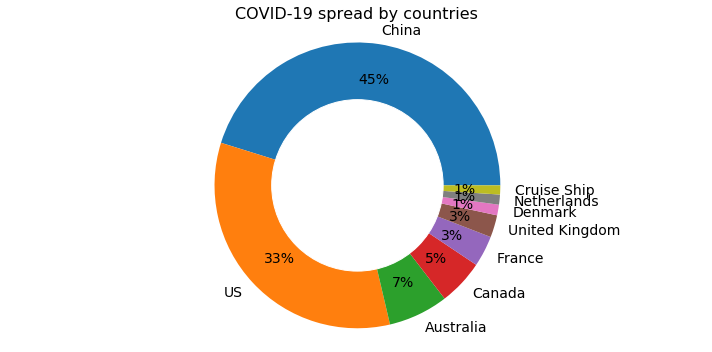

In [39]:
# Pie chart "COVID-19 spread by countries"

cc = df3in1['location'].value_counts().plot(kind='pie', figsize=(10,5), autopct="%.0f%%", pctdistance = 0.75, textprops={'fontsize': 14})

cc.set_title('COVID-19 spread by countries', fontsize=16)
cc.set_ylabel('')
circle = plt.Circle((0,0), 0.6, color='white')
cc.add_artist(circle)
plt.axis('equal')
plt.tight_layout()



In [40]:
# Active Cases today
df3in1['number_of_case'].sum() - (df3in1['number_of_death'].sum()+ df3in1['number_of_cured'].sum())

3354484.0

In [41]:
# Convert the date column to datetime object
df3in1['date'] =  pd.to_datetime(df3in1['date'], infer_datetime_format=True)
df3in1

/Users/olga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,location,Province/State,Country/Region,Lat,Long,date,number_of_case,new_case,number_of_death,new_death,number_of_cured,new_cured
0,NaN,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,NaN,0.0,NaN,0.0,NaN
1,NaN,NaN,Thailand,15.0000,101.0000,2020-01-23,3.0,1.0,0.0,0.0,0.0,0.0
2,NaN,NaN,Thailand,15.0000,101.0000,2020-01-24,5.0,2.0,0.0,0.0,0.0,0.0
3,NaN,NaN,Thailand,15.0000,101.0000,2020-01-25,7.0,2.0,0.0,0.0,0.0,0.0
4,NaN,NaN,Thailand,15.0000,101.0000,2020-01-26,8.0,1.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30125,NaN,NaN,Reunion,-21.1151,55.5364,2020-03-23,47.0,47.0,0.0,0.0,0.0,0.0
30187,NaN,NaN,French Guiana,3.9339,-53.1258,2020-03-23,18.0,18.0,0.0,0.0,6.0,6.0
30249,NaN,NaN,Mayotte,-12.8275,45.1662,2020-03-23,11.0,11.0,0.0,0.0,0.0,0.0
30311,US,United States Virgin Islands,US,18.3358,-64.8963,2020-03-23,6.0,6.0,0.0,0.0,0.0,0.0


Text(0.5, 0, 'Number of cases')

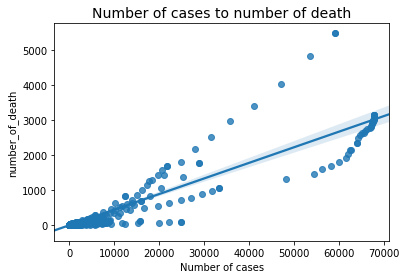

In [42]:

fig, ax = plt.subplots()
sns.regplot("number_of_case" , "number_of_death", data=df3in1, ax=ax)
ax.set_title("Number of cases to number of death", fontsize=14)
plt.xlabel('Number of cases')

In [43]:
# Plot: COVID-19 spread by date 
dff = df3in1.groupby(['date']).agg({'number_of_case':'sum'}).reset_index()
dff


,date,number_of_case
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1434.0
4,2020-01-26,2118.0
...,...,...
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0


Text(0, 0.5, 'number of case')

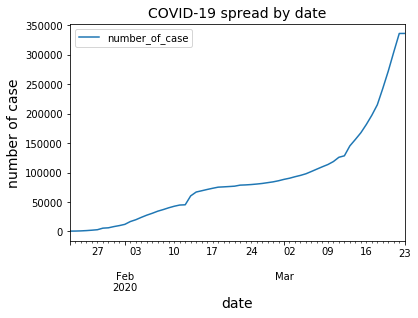

In [44]:
### The spread of COVID-19 by date
df3in1.groupby('date').agg({'number_of_case':'sum'}).plot(kind='line')
plt.title('COVID-19 spread by date',fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('number of case', fontsize=14)


Text(0, 0.5, 'number of cases')

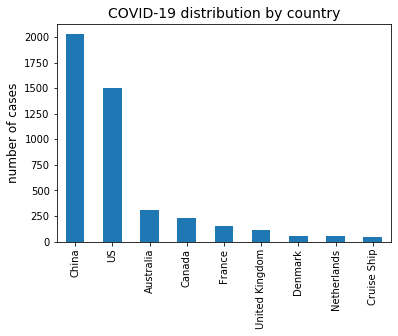

In [45]:
# Countries with the highest number of coronavirus infections
df3in1.location.value_counts().plot(kind='bar');
plt.title('COVID-19 distribution by country' , fontsize=14)
plt.ylabel('number of cases', fontsize=12)

Text(0, 0.5, 'number of cases')

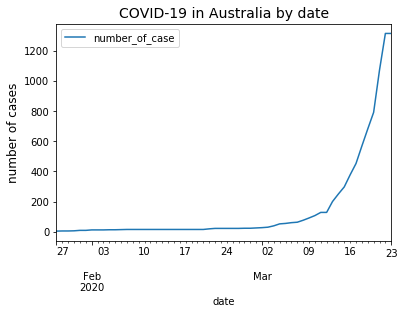

In [46]:
# COVID-19 in Australia by date
dff2 = df3in1[df3in1.location == "Australia"].groupby('date').agg({'number_of_case':'sum'}).plot(kind='line')
plt.title('COVID-19 in Australia by date',fontsize=14)
plt.ylabel('number of cases', fontsize=12)

Text(0, 0.5, 'number of cases')

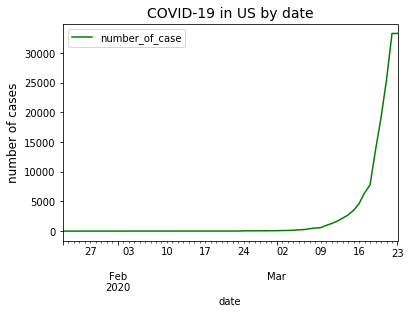

In [69]:
# COVID-19 in US by date
dff1 = df3in1[df3in1.location == "US"].groupby('date').agg({'number_of_case':'sum'}).plot(kind='line', color = 'green')
plt.title('COVID-19 in US by date',fontsize=14)
plt.ylabel('number of cases', fontsize=12)

Text(0, 0.5, 'number of cases')

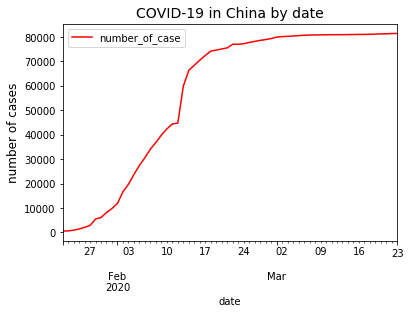

In [48]:
# COVID-19 in China by date
dff3 = df3in1[df3in1.location == "China"].groupby('date').agg({'number_of_case':'sum'}).plot(kind='line', color ='red')
plt.title('COVID-19 in China by date',fontsize=14)
plt.ylabel('number of cases', fontsize=12)

In [49]:
#Time series

In [133]:
# Number of new cases per day, the ‘date’ column as index column
time_ser = df3in1.groupby(['date']).agg({'number_of_case':'sum'}).reset_index()
time_ser.set_index("date", inplace = True)
time_ser




,number_of_case
date,
2020-01-22,555.0
2020-01-23,653.0
2020-01-24,941.0
2020-01-25,1434.0
2020-01-26,2118.0
...,...
2020-03-19,242708.0
2020-03-20,272166.0
2020-03-21,304524.0


Text(0, 0.5, 'number of case')

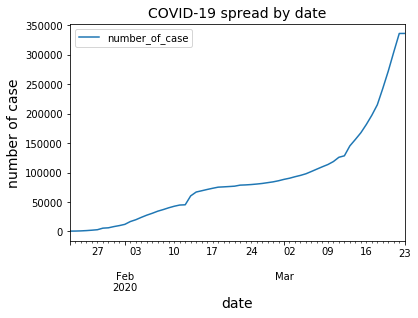

In [102]:
time_ser.plot()
plt.title('COVID-19 spread by date',fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('number of case', fontsize=14)


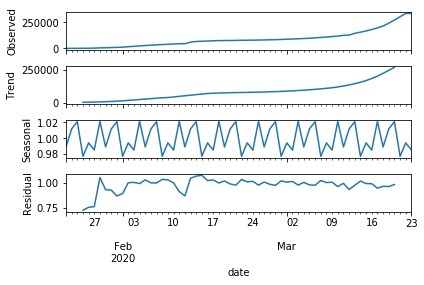

In [104]:
# Decomposing using statsmodel

from statsmodels.tsa.seasonal import seasonal_decompose
result_components = seasonal_decompose(time_ser, model='multiplicative')
result_components.plot()
plt.show()

# REsult: Clearly, there is an upward trend.

In [212]:
result = adfuller(time_ser['number_of_case'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))
    
# The ADF Statistic is far from the critical values and the p-value is greater 
#than the threshold (0.05). Thus, we can conclude that the time series is not stationary.

ADF Statistic: 1.0059552094027695
p-value: 0.9943283872040672
Critical Values:
	1%: -3.5443688564814813
	5%: -2.9110731481481484
	10%: -2.5931902777777776


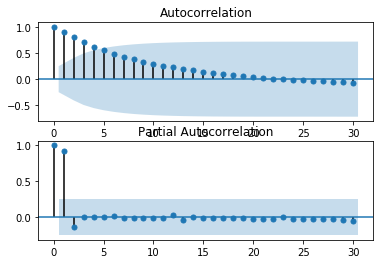

In [173]:
# the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()
pyplot.subplot(211)
plot_acf(time_ser.number_of_case, ax=pyplot.gca(), lags = 30)

pyplot.subplot(212)
plot_pacf(time_ser.number_of_case, ax=pyplot.gca(), lags = 30)
pyplot.show()

# RESULT: 
# If the time series is stationary, the ACF/PACF plots will show a quick drop-off 
# in correlation after a small amount of lag between points.
# This data is non-stationary as a high number of previous observations are correlated with future values.
# Confidence intervals are drawn as a cone.
# By default, this is set to a 95% confidence interval, suggesting that correlation values
# outside of this code are very likely a correlation and not a statistical fluke.
# The partial autocorrelation at lag k is the correlation that results after removing
# the effect of any correlations due to the terms at shorter lags.

Text(0.5, 1.0, 'Smoothed trend for time series stationarity')

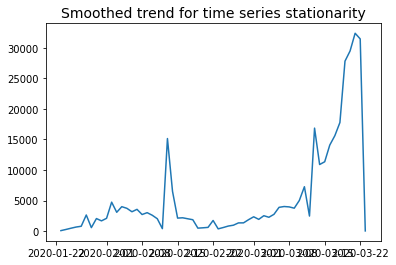

In [215]:
# remove trend 
# we take the difference of the observation at a particular instant 
# with that at the previous instant. 

ts_log_diff = time_ser.number_of_case - time_ser.number_of_case.shift()
plt.plot(ts_log_diff)
plt.title('Smoothed trend for time series stationarity',fontsize=14)

In [424]:
from statsmodels.tsa.arima_model import ARIMA
input_series= np.asarray(time_ser)
model_arima = ARIMA(input_series, order=(0,1,1))
model_fit = model_arima.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   61
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -615.890
Method:                       css-mle   S.D. of innovations           5839.909
Date:                Wed, 25 Mar 2020   AIC                           1237.779
Time:                        10:15:34   BIC                           1244.112
Sample:                             1   HQIC                          1240.261
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5291.6529   1250.039      4.233      0.000    2841.622    7741.683
ma.L1.D.y      0.6825      0.084      8.097      0.000       0.517       0.848
                                    Roots           